# Neural Networks with Derivatives

# Installing Dependencies

- networkx is for visualizing graphs
- numpy is for array manipulation
- pandas is for data manipulations in form of tables
- matplotlib is for plotting data and visualization

In [1]:
!pip install networkx
!pip install numpy
!pip install pandas
!pip install matplotlib

# Importing Libraries

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Derivative:
#### The derivative is a fundamental tool of calculus that **quantifies the sensitivity of change** of a **function's output with respect to its input**.

$$ L = \lim_{{h \to 0}} \frac{{f(a + h) - f(a)}}{h} $$

### Let's take a Simple Parabolic Function:

$$ f(x) = ax^2 + bx + c $$


In [3]:
# Assuming random 'a', 'b' and 'c' values
def f(x):
    return 3*x**2 + 2*x + 1

In [4]:
xs = np.arange(-5,5,0.25) # Creates a list of numbers from -5 to +5 with a step of 0.25
ys = f(xs)
for i in range(len(xs)):
    print(f"When x={xs[i]}; y={ys[i]}")

When x=-5.0; y=66.0
When x=-4.75; y=59.1875
When x=-4.5; y=52.75
When x=-4.25; y=46.6875
When x=-4.0; y=41.0
When x=-3.75; y=35.6875
When x=-3.5; y=30.75
When x=-3.25; y=26.1875
When x=-3.0; y=22.0
When x=-2.75; y=18.1875
When x=-2.5; y=14.75
When x=-2.25; y=11.6875
When x=-2.0; y=9.0
When x=-1.75; y=6.6875
When x=-1.5; y=4.75
When x=-1.25; y=3.1875
When x=-1.0; y=2.0
When x=-0.75; y=1.1875
When x=-0.5; y=0.75
When x=-0.25; y=0.6875
When x=0.0; y=1.0
When x=0.25; y=1.6875
When x=0.5; y=2.75
When x=0.75; y=4.1875
When x=1.0; y=6.0
When x=1.25; y=8.1875
When x=1.5; y=10.75
When x=1.75; y=13.6875
When x=2.0; y=17.0
When x=2.25; y=20.6875
When x=2.5; y=24.75
When x=2.75; y=29.1875
When x=3.0; y=34.0
When x=3.25; y=39.1875
When x=3.5; y=44.75
When x=3.75; y=50.6875
When x=4.0; y=57.0
When x=4.25; y=63.6875
When x=4.5; y=70.75
When x=4.75; y=78.1875


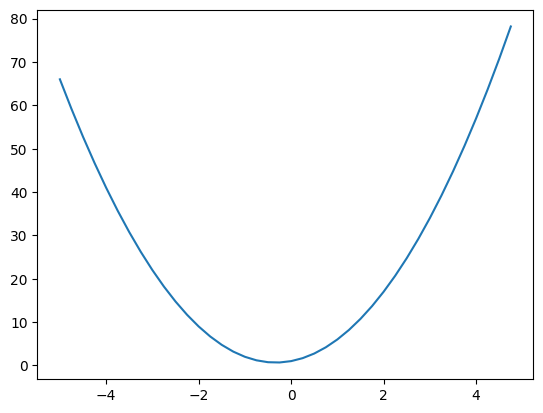

In [5]:
# Plotting the points on a graph gives us...
plt.plot(xs,ys)

According to the definition of Derivatives, we have to check what is the sensitivity of 'x' if we bump the value with 'h'

In [6]:
# Let's take a very small value of h and check the sensitivity in both positive and negetive
h = 0.1
x = 1.0
( f(x + h) / ( f(x) ) ) / h

11.383333333333333

In [7]:
# Let's take a very small value of h and check the sensitivity in both positive and negetive
h = -0.1
x = 1.0
( f(x + h) / ( f(x) ) ) / h

-8.716666666666667

Let's try a different scenario where we use mathematical expressions to understand derivatives

In [8]:
# Let's say we have an expression with values

j = 5.0
k = -0.1
l = 10.0

h = 0.001

expressionBeforeBumping = j * k + l
l += h # Here the value of l is bumped up in the positive direction
expressionAfterBumping = j * k + l
slope = (expressionAfterBumping - expressionBeforeBumping)/h

print(f"Expression before bumping: {expressionBeforeBumping};", f"Expression after bumping: {expressionAfterBumping};", f"Slope {slope}")

Expression before bumping: 9.5; Expression after bumping: 9.501; Slope 0.9999999999994458


# Why are Derivatives Important?

Eventually, when we arrive at the important parts like gradient descent algorithm, we will be requiring derivatives.

**What is "Gradient" you ask?**

Imagine a car being dropped on a parabolic slope. You want the car to 'eventually' stop at a particular point. So you start applying brakes (basically a force in the opposite direction) of the movement.

This force in the opposite direction is known as a gradient.

**What is the relationship between a 'derivative' and a 'gradient'?**

A 'Gradient' is a 'Derivative' with known direction.
In Derivatives we check the sensitivity in all directions for a value.
But in Gradients we know the direction we want to push, we just have to tinker with the value.

# Mathematical Example

#### Let's take a more complicated mathematical expression and try to evaluate it with gradients:

Let's assume random values as 'r'

1. A = r
2. B = r
3. C = A * B
4. D = r
5. E = C + D
6. F = r
7. L = E * F

Where **L** is the result of this expression

In [9]:
# Let's construct a Value class to store all the expressions for simpler calculations
class Value:
    # Constructor
    def __init__(self , data,_children=(), label='', _op=''):
        self.data = data
        self.label = label
        # Used for Graph Construction
        self._prev = set(_children)
        self._op = _op if _op else label
    # For Printing Without Print Statements | Representation
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return Value(self.data + other.data, (self, other), '+')
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return Value(self.data * other.data, (self, other), '*')
    # other + self
    def __radd__(self, other):
        return self + other
    # other * self
    def __rmul__(self, other):
        return self * other

In [10]:
a = Value(3, label='a')
b = Value(-2, label='b')
c = a * b
d = Value(5, label='d')
e = c + d
f = Value(-10, label='f')
L = e * f

c.label = 'c'
e.label = 'e'
L.label = 'L'

Let's visualize our expression in form of expression graphs now

In [11]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_networkx(root, rankdir='LR'):
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    
    G = nx.DiGraph()
    
    for n in nodes:
        label = "{label} \n d={data:.4f}".format(label=n.label, data=n.data)
        G.add_node(str(id(n)), label=label)
        if n._op:
            G.add_node(str(id(n)) + n._op, label=n._op)
            G.add_edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        G.add_edge(str(id(n1)), str(id(n2)) + n2._op)
    
    pos = None
    if rankdir == 'LR':
        pos = nx.spring_layout(G, seed=4)
    
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos=pos, with_labels=True, labels=labels, font_size=6, font_weight='bold')
    plt.show()

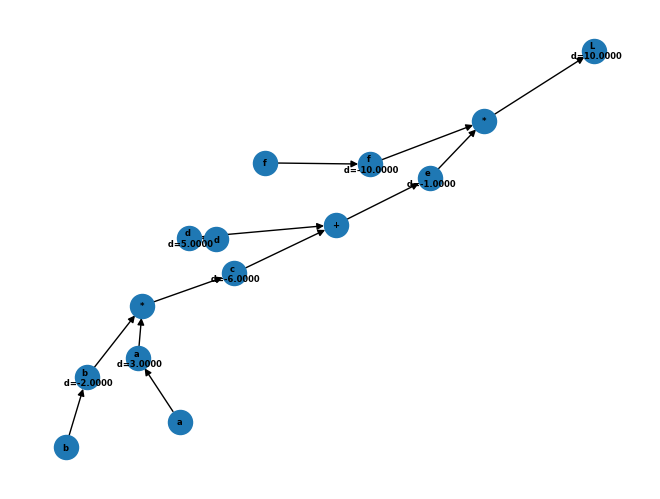

In [12]:
draw_networkx(L)

Now the expression brings us to our next question...

We know that L = E * F

What is the **derivative of L**?

Or more specifically

What is the result of

$$ \frac{dL}{de} $$

?

If we take the formula for our good old derivatives... 
We get:
$$ ((f(x+h) - f(x)) / h) $$

Substituting the values from the formula L = E * F

Because we are trying to understand that if we nudge the value of e by a certain amount 'h' how sensitive 'L' is:

=> $$ ((e+h)*f - (e*f)) / h $$
=> $$ (e*f) + (h*f) - (e*f) / h $$
=> $$ (h*f) / h $$
=> $$ f $$

In [13]:
# Let's modify our Value Class

class Value:
    # Constructor
    def __init__(self, data, _children=(), label='', _op=''):
        self.data = data
        self.label = label
        self.grad = 0
        self._backward = lambda: None
        # Used for Graph Construction
        self._prev = set(_children)
        self._op = _op if _op else label

    def backward(self):
        # Topological Sort, Sorting for Directed Acyclic Graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # Freshly starting back propagation with its value as 1
        self.grad = 1

        # Backpropagation for Other Nodes
        for vertex in topo:
            vertex._backward()
        
    # For Printing Without Print Statements | Representation
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return Value(self.data + other.data, (self, other), '+')
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    # other + self
    def __radd__(self, other):
        return self + other
    # other * self
    def __rmul__(self, other):
        return self * other

We can manually back propagate and set the gradient to be interchanged with the data of the adjacent class for the moment...
Cause we cannot do L.backward() at the moment, as we only implemented the derivative function of the multiplication method...

In [14]:
# Let's modify our draw network to represent the gradients as well...

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_networkx(root, rankdir='LR'):
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    
    G = nx.DiGraph()
    
    for n in nodes:
        label = "{label} \n d={data:.4f} \n g={grad:.4f}".format(label=n.label, data=n.data, grad=n.grad)
        G.add_node(str(id(n)), label=label)
        if n._op:
            G.add_node(str(id(n)) + n._op, label=n._op)
            G.add_edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        G.add_edge(str(id(n1)), str(id(n2)) + n2._op)
    
    pos = None
    if rankdir == 'LR':
        pos = nx.spring_layout(G, seed=4)
    
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos=pos, with_labels=True, labels=labels, font_size=6, font_weight='bold')
    plt.show()

In [15]:
# draw_networkx(L) Won't Work

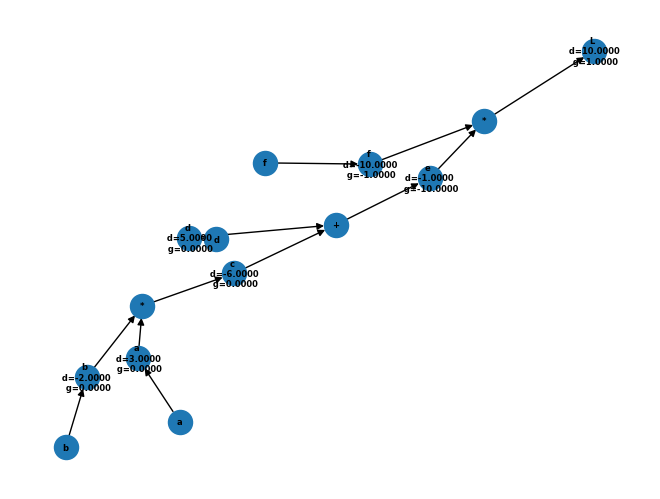

In [16]:
# Manually Setting Gradient for Expression L = E * F
L.grad = 1

e.grad = f.data

f.grad = e.data

# All other nodes, required for drawing graph otherwise would throw an error expecting for gradient value
a.grad = 0
b.grad = 0
c.grad = 0
d.grad = 0

draw_networkx(L)

Now the next question that comes to the mind is...

**What is the result of**

$$ \frac{dL}{dd} $$

?

Which follows up with

$$ \frac{de}{dd} $$

Because we are now **know how L is sensitive to e**, we are now trying to **understand how L is sensitive to d**

We Know:
E = C + D

Lets take our old derivative formula again:

$$ ((f(x+h) - f(x)) / h) $$

Substituting the values from the formula: E = C + D

Because we are trying to understand that if we nudge the value of d by a certain amount 'h' how sensitive 'e' is:

=> $$ (((d+h)+c) - (d+c)) / h $$
=> $$ (d + h + c - d - c) / h $$
=> $$ (h) / h $$
=> $$ 1 $$

Now let's follow up with another mathematical section of the derivatives known as

# Chain Rule

The expression evaluates to :

$$ \frac{dz}{dx} = \frac{dz}{dy} * \frac{dy}{dx} $$

So,

We **WANT**:
$$ \frac{dL}{dd} $$

We **KNOW**:
$$ \frac{dL}{de} $$
$$ \frac{de}{dd} $$

Applying Chain Rule:

$$ \frac{dz}{dx} = \frac{dz}{dy} * \frac{dy}{dx} $$

We Substitute the values of:
- z with L
- y with e
- x with d

We get:
$$ \frac{dL}{dd} = \frac{dL}{de} * \frac{de}{dd} $$

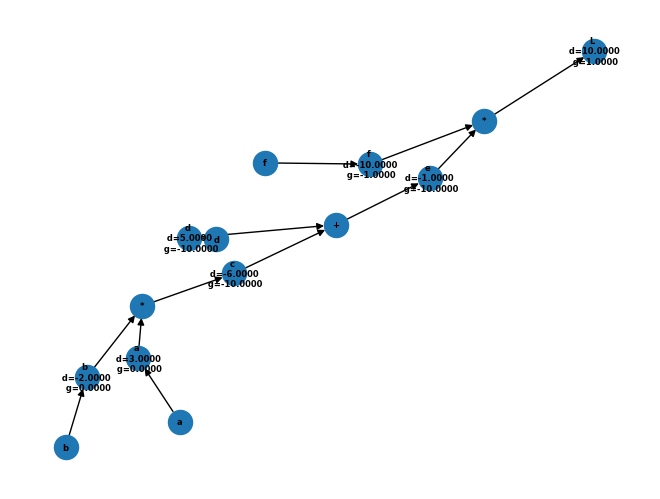

In [17]:
# Manually Setting Gradient for Expression E = C + D

# Old Expression
L.grad = 1
e.grad = f.data
f.grad = e.data

# New Expression
c.grad = e.grad
d.grad = e.grad

# All other nodes
a.grad = 0
b.grad = 0

draw_networkx(L)

Once again,

We **WANT**:
$$ \frac{dL}{da} $$

We **KNOW**:
$$ \frac{dL}{de} $$ Our Global Derivative

Applying Chain Rule:

$$ \frac{dz}{dx} = \frac{dz}{dy} * \frac{dy}{dx} $$

We get:
$$ \frac{dL}{da} = \frac{dL}{de} * \frac{de}{dd} $$

Where,
$$ \frac{dL}{de} $$ Is our **Global Derivative**
$$ \frac{dc}{da} $$ Is our **Local Derivative**

To our good old,
C = A * B

We ask what is:
$$ \frac{dc}{da} $$

So with the perspective of **Global Derivative** & **Local Derivative**,

We get:
$$ Current Gradient = Global Derivative * Local Derivative $$

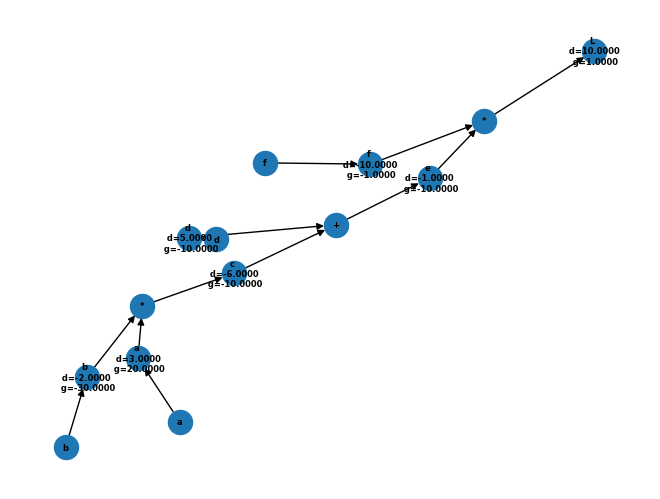

In [18]:
# Manually Setting Gradient for Expression C = A * B

# Old Expression
L.grad = 1
e.grad = f.data
f.grad = e.data
c.grad = e.grad
d.grad = e.grad

# New Expression
a.grad = (c.grad * b.data)
b.grad = (c.grad * a.data)

draw_networkx(L)

In [19]:
# Let's modify our Value Class again after getting the idea of global and local derivatives

class Value:
    # Constructor
    def __init__(self, data, _children=(), label='', _op=''):
        self.data = data
        self.label = label
        self.grad = 0
        self._backward = lambda: None
        # Used for Graph Construction
        self._prev = set(_children)
        self._op = _op if _op else label

    def backward(self):
        # Topological Sort, Sorting for Directed Acyclic Graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # Freshly starting back propagation with its value as 1
        self.grad = 1

        # Backpropagation for Other Nodes
        for vertex in topo:
            vertex._backward()
        
    # For Printing Without Print Statements | Representation
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    # other + self
    def __radd__(self, other):
        return self + other
    # other * self
    def __rmul__(self, other):
        return self * other

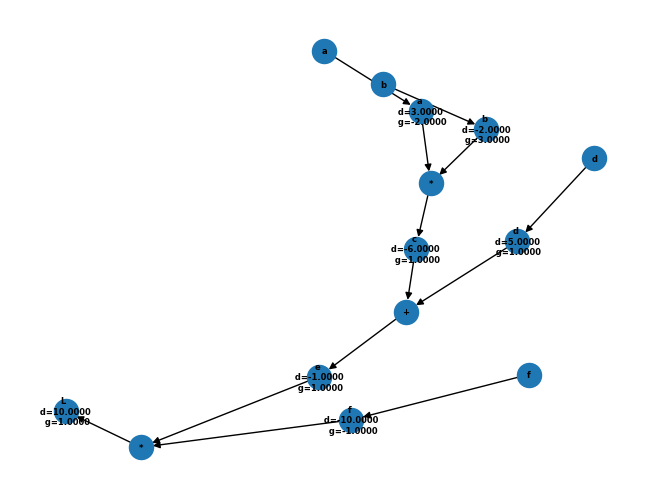

In [20]:
# Redefining our expression

a = Value(3, label='a')
b = Value(-2, label='b')
d = Value(5, label='d')
f = Value(-10, label='f')

# Forward Pass
c = a * b
e = c + d
L = e * f

c.label = 'c'
e.label = 'e'
L.label = 'L'

# Backward Pass
L.backward()
e.backward()
c.backward()

draw_networkx(L)

So we know how **forward pass** and **backward pass** works now

Let's now move on to something called a 
# Neuron

So what is a **Neuron**? Or more specifically an **Artificial Neuron**?

An artificial neuron is a mathematical function:

$$
y_k = \varphi\left(\sum_{j=0}^{m} w_{kj}x_j\right)
$$

Let's Visualize this \
![Artificial Neuron](https://i.stack.imgur.com/7mTvt.jpg)


So in simple terms an Artificial Neuron is a mathematical expression, \
That takes multiple inputs of say 'x' \
These inputs have their own weights, say 'w' \
And all this inputs have a common bias, say 'b' \
These inputs are then passed through a summation function \
The output of these summed inputs is then passed through an activation function \
which acts as a threshold function to limit the output to a certain value.

Which evaluates to the expression:

$$
\text{Summation Function} = x_1w_1 + x_2w_2 + \ldots + x_nw_n + b
$$

Then,
$$
\text{Neuron Output} =f(\text{Summation Function})
$$

So let's now practice with a neuron expression
Let's take a simple expression:

Summation Function = (x1w1 + x2w2 + b)
Neuron Output = (Summation Function) -> tanh(Summation Function)

Where tanh() is our activation function of choice.

**How does tanh() work?**

![](https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1524687495762-MQLVJGP4I57NT34XXTF4/TanhFunction.jpg)

We can see it returns a value between -1 and 1

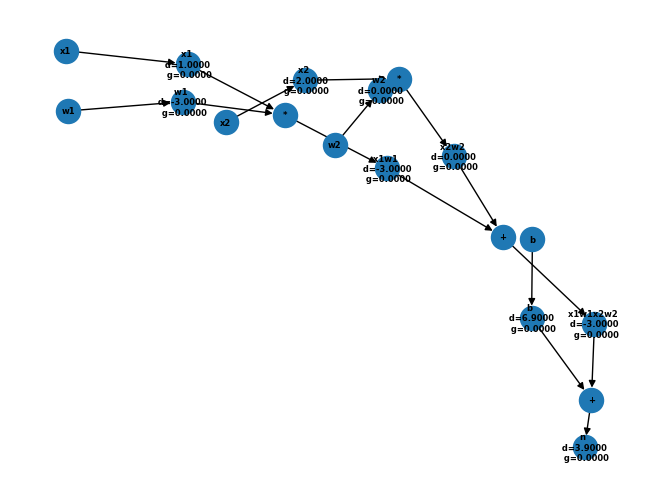

In [21]:
# So, let's take our simple expression

# Inputs
x1 = Value(1, label='x1')
x2 = Value(2, label='x2')

# Weights
w1 = Value(-3, label='w1')
w2 = Value(0, label='w2')

# Inputs
b = Value(6.9, label='b')

# Forward Pass
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# n.tanh()
# tanh is not implemented yet... so lets do that next

draw_networkx(n)

So Let's Now Construct Tanh()


According to the definition tanh() formulates to:
$$ \tanh x = \frac{\sinh x}{\cosh x} = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1} $$

We see that, in order to use the tanh method we need to implement **exponentiation** as well...

Now what is the **exponentiation function**?

It evaluates to:
$$ e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \ldots $$
![Exponentiation Function](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Exp_series.gif/220px-Exp_series.gif)



We can see that, in the exponentiation function the series can go upto $$ \infty $$

So we can define our own exponentiation function limiting the series to 'n' terms...

Note:

Derivative of tanh() according to Wikipedia is:
$$ 1 - \tanh^2 x $$

Derivative of exp() according to Wikipedia is:
$$ \frac{d}{dx}e^x = e^x \quad \text{and} \quad e^0 = 1 $$

In [22]:
# Let's modify our Value Class again to implement exp and tanh functionality

class Value:
    # Constructor
    def __init__(self, data, _children=(), label='', _op=''):
        self.data = data
        self.label = label
        self.grad = 0
        self._backward = lambda: None
        # Used for Graph Construction
        self._prev = set(_children)
        self._op = _op if _op else label

    def backward(self):
        # Topological Sort, Sorting for Directed Acyclic Graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # Freshly starting back propagation with its value as 1
        self.grad = 1

        # Backpropagation for Other Nodes
        for vertex in topo:
            vertex._backward()
        
    # For Printing Without Print Statements | Representation
    def __repr__(self):
        return f"Value(data={self.data}, label='{self.label}', grad={self.grad:.4f})"
    def __format__(self, format_spec):
        if format_spec == '':
            return str(self)
        return self.data.__format__(format_spec)
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    def exp(self, terms=10):
        x = self.data
        result = 1.0
        factorial = 1.0
    
        for i in range(1, int(terms) + 1):
            factorial *= i
            result += (x**i) / factorial
        out = Value(result, (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        
        return out
    def tanh(self):
        x = self.data
        t = (self.exp(2*x) - 1)/(self.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
    
        def _backward():
          self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out
    # -self
    def __neg__(self):
        return self * -1
    # other + self
    def __radd__(self, other):
        return self + other
    # self - other
    def __sub__(self, other): 
        return self + (-other)
    # other - self
    def __rsub__(self, other): 
        return other + (-self)
    # other * self
    def __rmul__(self, other):
        return self * other
    # self / other
    def __truediv__(self, other):
        return self * other**-1
    # other / self
    def __rtruediv__(self, other):
        return other * self**-1

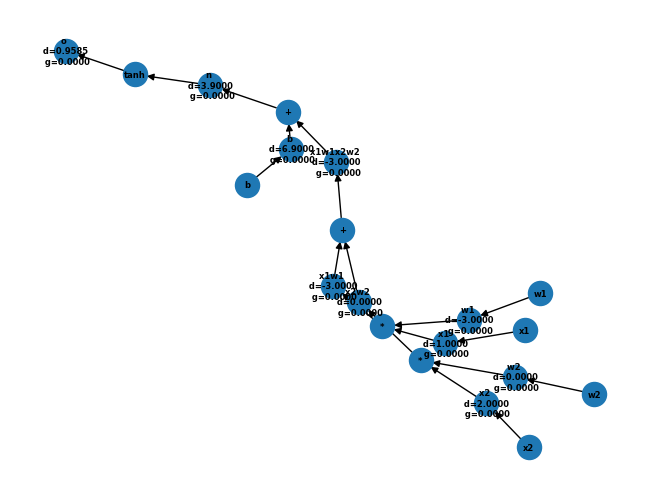

In [23]:
# So, let's take our simple expression

# Inputs
x1 = Value(1, label='x1')
x2 = Value(2, label='x2')

# Weights
w1 = Value(-3, label='w1')
w2 = Value(0, label='w2')

# Inputs
b = Value(6.9, label='b')

# Forward Pass
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_networkx(o)

Now that we understand how neurons work, we can now move on to building the official Neuron class

In [24]:
import random # Yes I did cheat a little bit, otherwise without 'random' my brain would pop like a popsickle

class Neuron:
    def __init__(self, numberOfInputs):
        self.w = [Value(random.uniform(-1,1)) for _ in range(numberOfInputs)]
        self.b = Value(random.uniform(-1,1))
    # Method to use f(x) notation when we initialize the variable f with Neuron class as a Neuron object
    def __call__(self, x):
        activation = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        output = activation.tanh()
        return output

In [25]:
# Testing the initial Neuron class
inputs = [6.0,9.0]
testNeuron = Neuron(2)
testNeuron(inputs)

Value(data=Value(data=0.0, label='*', grad=0.0000), label='tanh', grad=0.0000)

Let's now make a **Neuron Layer** which will eventually help us make a **Multi Layer Perceptron** or **MLP**

Let's visualize a Neural Network with MLP: \
![MLP](https://editor.analyticsvidhya.com/uploads/84918Neural-network-architecture-diagram.png)

Let's construct a Layer class

In [26]:
class Neuron:
    def __init__(self, numberOfInputs):
        self.w = [Value(random.uniform(-1,1)) for _ in range(numberOfInputs)]
        self.b = Value(random.uniform(-1,1))
    # Method to use f(x) notation when we initialize the variable f with Neuron class as a Neuron object
    def __call__(self, x):
        activation = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        output = activation.tanh()
        return output

class Layer:
    def __init__(self, numberOfInputs, numberOfOutputs):
        self.neurons = [Neuron(numberOfInputs) for _ in range(numberOfOutputs)]
    def __call__(self, x):
        return [n(x) for n in self.neurons]

In [27]:
# Testing the initial Layer class
inputs = [6.0,9.0]
testLayer = Layer(2,3)
testLayer(inputs)

[Value(data=Value(data=0.0, label='*', grad=0.0000), label='tanh', grad=0.0000),
 Value(data=Value(data=0.8758937285024199, label='*', grad=0.0000), label='tanh', grad=0.0000),
 Value(data=Value(data=0.9470786783646301, label='*', grad=0.0000), label='tanh', grad=0.0000)]

We can now construct a MultiLayerPerceptron
Let's construct our very own diagram as MLP example \
![MLP](https://editor.analyticsvidhya.com/uploads/84918Neural-network-architecture-diagram.png)

In [28]:
# Modified Value class to fix tanh error in computing int(terms)
class Value:
    # Constructor
    def __init__(self, data, _children=(), label='', _op=''):
        self.data = data
        self.label = label
        self.grad = 0
        self._backward = lambda: None
        # Used for Graph Construction
        self._prev = set(_children)
        self._op = _op if _op else label

    def backward(self):
        # Topological Sort, Sorting for Directed Acyclic Graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # Freshly starting back propagation with its value as 1
        self.grad = 1

        # Backpropagation for Other Nodes
        for vertex in topo:
            vertex._backward()
        
    # For Printing Without Print Statements | Representation
    def __repr__(self):
        return f"Value(data={self.data}, label='{self.label}', grad={self.grad:.4f})"
    def __format__(self, format_spec):
        if format_spec == '':
            return str(self)
        return self.data.__format__(format_spec)
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    def exp(self, terms=10):
        x = self.data
        result = 1.0
        factorial = 1.0
    
        for i in range(1, int(terms) + 1):
            factorial *= i
            result += (x**i) / factorial
    
        out = Value(result, (self,), 'exp')
    
        def _backward():
            self.grad += out.data * out.grad
    
        out._backward = _backward
    
        return out
    def tanh(self):
        x = self.data
        exp_2x = self.exp(2*x)
        t = (exp_2x - 1) / (exp_2x + 1)
        out = Value(t.data, (self, ), 'tanh')
    
        def _backward():
            self.grad += (1 - t.data**2) * out.grad
        out._backward = _backward

        return out
    # -self
    def __neg__(self):
        return self * -1
    # other + self
    def __radd__(self, other):
        return self + other
    # self - other
    def __sub__(self, other): 
        return self + (-other)
    # other - self
    def __rsub__(self, other): 
        return other + (-self)
    # other * self
    def __rmul__(self, other):
        return self * other
    # self / other
    def __truediv__(self, other):
        return self * other**-1
    # other / self
    def __rtruediv__(self, other):
        return other * self**-1
        
class Neuron:
    def __init__(self, numberOfInputs):
        self.w = [Value(random.uniform(-1,1)) for _ in range(numberOfInputs)]
        self.b = Value(random.uniform(-1,1))
    # Method to use f(x) notation when we initialize the variable f with Neuron class as a Neuron object
    def __call__(self, x):
        activation = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        output = activation.tanh()
        return output

class Layer:
    def __init__(self, numberOfInputs, numberOfOutputs):
        self.neurons = [Neuron(numberOfInputs) for _ in range(numberOfOutputs)]
    def __call__(self, x):
        return [n(x) for n in self.neurons]
        
class MultiLayerPerceptron:
    def __init__(self, numberOfInputs, listOfNumberOfOutputsInEachLayer):
        sz = [numberOfInputs] + listOfNumberOfOutputsInEachLayer
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(listOfNumberOfOutputsInEachLayer))]
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [29]:
# Testing the initial MultiLayerPerceptron class
inputs = [6.0,9.0,6.0,9.0]
testMultiLayerPerceptron = MultiLayerPerceptron(3,[5,3,2])
testMultiLayerPerceptron(inputs)

[Value(data=0.0, label='tanh', grad=0.0000),
 Value(data=0.0, label='tanh', grad=0.0000)]

In [30]:
# Lets create a simpler neural network to eventually build the loss function
inputs = [6.0,9.0]
testMultiLayerPerceptron = MultiLayerPerceptron(3,[4,4,1])
testMultiLayerPerceptron(inputs)

[Value(data=0.0, label='tanh', grad=0.0000)]

Now,

**What is a loss function**?

Loss function is a single number that is evaluated based on the individual losses of a neural network which says how good is our neural network.

If loss is high, our neural network is performing bad.
If loss is low, our neural network is performing good.

Before that let's define our **dataset** to train our network

In [31]:
# Let's define four different input examples to the dataset
xs = [
  [1.0, 1.0, -1.],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [2.0, 3.0, -1.0],
]
# And their individual outputs as labels
ys = [-1.0, 1.0, 1.0, -1.0]

One of the most popular way to calculate loss is the **Mean Squared Error**

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left(Y_i - \hat{Y_i}\right)^2 $$

Where,
$$ \text{MSE} = \text{Mean Squared Error} $$	
$$ {n} = \text{Number of data points} $$
$$ Y_{i} = \text{Observed Values or Actual Values} $$
$$ \hat{Y}_{i} = \text{Predicted Values} $$

In [32]:
# Predicting Values from Data Examples
ypred = [testMultiLayerPerceptron(inputs) for inputs in xs]
# So eventually loss can be calculated as
loss = sum((yout[0] - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=4.0, label='+', grad=0.0000)

In [33]:
# We can now backpropagate from our loss element
loss.backward()

Let's now make a parameters attribute in each of these classes' definition to very handily set parameters in a batch

For us, our parameters are:
 - For a Neuron -> The Weights and Biases
 - For a Layer -> The Parameters for all the Neurons in that Layer
 - For a Multi-Layer Perceptron -> The Parameters for all the Parameters in a Layer

In [34]:
# So eventually our classes look like
class Value:
    # Constructor
    def __init__(self, data, _children=(), label='', _op=''):
        self.data = data
        self.label = label
        self.grad = 0
        self._backward = lambda: None
        # Used for Graph Construction
        self._prev = set(_children)
        self._op = _op if _op else label

    def backward(self):
        # Topological Sort, Sorting for Directed Acyclic Graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # Freshly starting back propagation with its value as 1
        self.grad = 1

        # Backpropagation for Other Nodes
        for vertex in topo:
            vertex._backward()
        
    # For Printing Without Print Statements | Representation
    def __repr__(self):
        return f"Value(data={self.data}, label='{self.label}', grad={self.grad:.4f})"
    def __format__(self, format_spec):
        if format_spec == '':
            return str(self)
        return self.data.__format__(format_spec)
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out
    def exp(self, terms=10):
        x = self.data
        result = 1.0
        factorial = 1.0
    
        for i in range(1, int(terms) + 1):
            factorial *= i
            result += (x**i) / factorial
    
        out = Value(result, (self,), 'exp')
    
        def _backward():
            self.grad += out.data * out.grad
    
        out._backward = _backward
    
        return out
    def tanh(self):
        x = self.data
        exp_2x = self.exp(2*x)
        t = (exp_2x - 1) / (exp_2x + 1)
        out = Value(t.data, (self, ), 'tanh')
    
        def _backward():
            self.grad += (1 - t.data**2) * out.grad
        out._backward = _backward

        return out
    # -self
    def __neg__(self):
        return self * -1
    # other + self
    def __radd__(self, other):
        return self + other
    # self - other
    def __sub__(self, other): 
        return self + (-other)
    # other - self
    def __rsub__(self, other): 
        return other + (-self)
    # other * self
    def __rmul__(self, other):
        return self * other
    # self / other
    def __truediv__(self, other):
        return self * other**-1
    # other / self
    def __rtruediv__(self, other):
        return other * self**-1
        
class Neuron:
    def __init__(self, numberOfInputs):
        self.w = [Value(random.uniform(-1,1)) for _ in range(numberOfInputs)]
        self.b = Value(random.uniform(-1,1))
    # Method to use f(x) notation when we initialize the variable f with Neuron class as a Neuron object
    def __call__(self, x):
        activation = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        output = activation.tanh()
        return output
    # The weights and biases in the Neuron
    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, numberOfInputs, numberOfOutputs):
        self.neurons = [Neuron(numberOfInputs) for _ in range(numberOfOutputs)]
    def __call__(self, x):
        return [n(x) for n in self.neurons]
    # The Parameters for all the Neurons in that Layer
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]
        
class MultiLayerPerceptron:
    def __init__(self, numberOfInputs, listOfNumberOfOutputsInEachLayer):
        sz = [numberOfInputs] + listOfNumberOfOutputsInEachLayer
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(listOfNumberOfOutputsInEachLayer))]
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    # The Parameters for all the Parameters in a Layer
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
    def __repr__(self):
        return f"MultiLayerPerceptron of [{', '.join(str(layer) for layer in self.layers)}]"

In [35]:
# Lets create a simpler neural network to eventually build the loss function
inputs = [6.0,9.0]
testMultiLayerPerceptron = MultiLayerPerceptron(3,[4,4,1])
testMultiLayerPerceptron(inputs)

[Value(data=0.0, label='tanh', grad=0.0000)]

In [36]:
# Let's define four different input examples to the dataset
xs = [
  [1.0, 1.0, -1.],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [2.0, 3.0, -1.0],
]
# And their individual outputs as labels
ys = [-1.0, 1.0, 1.0, -1.0]

In [37]:
# Predicting Values from Data Examples
ypred = [testMultiLayerPerceptron(inputs) for inputs in xs]
# So eventually loss can be calculated as
loss = sum((yout[0] - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=4.0, label='+', grad=0.0000)

In [38]:
# We can now backpropagate from our loss element
loss.backward()

If we start nudging the data based on the gradient for all the parameters now,
Our loss starts to effectively decrese now...

In [39]:
for p in testMultiLayerPerceptron.parameters():
    p.data += -0.1 * p.grad

In [40]:
# We can now run this same cell over and over to get a loss sequentially

# Forward Pass
ypred = [testMultiLayerPerceptron(inputs) for inputs in xs]
loss = sum((yout[0] - ygt)**2 for ygt, yout in zip(ys, ypred))
print(f"{loss.data:.10f}")

# Backward Pass
loss.backward()

# Updating Data Values
for p in testMultiLayerPerceptron.parameters():
    p.data += -1 * p.grad

4.0000000000


We can now eventually build a loop to iteratively come to gradient descent approach in a more natural manner

In [41]:
passes = 10

for index in range(passes):
    # Forward Pass
    ypred = [testMultiLayerPerceptron(inputs) for inputs in xs]
    loss = sum((yout[0] - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    # Backward Pass
    loss.backward()
    
    # Updating Data Values
    for p in testMultiLayerPerceptron.parameters():
        p.data += -1 * p.grad

    print(index,f"{loss.data:.20f}")

0 4.00000000000000000000
1 4.00000000000000000000
2 4.00000000000000000000
3 4.00000000000000000000
4 4.00000000000000000000
5 4.00000000000000000000
6 4.00000000000000000000
7 4.00000000000000000000
8 4.00000000000000000000
9 4.00000000000000000000


In Conclusion,

1. We saw how we can turn simple Values into mathematical expressions
2. How their derivatives take place mathematically and practically
3. Reused these Values to build Neurons
4. Saw how these Neurons can form a Layer
5. Saw how these Layers can be grouped to make a Multi Layer Perceptron
6. Saw how we do a forward pass in these Neural Networks
7. Saw how we calculate the loss function in these Neural Networks
8. Saw how we do a backward pass in these Neural Networks
9. Saw how update the data values in these Neural Networks
10. Saw how we make a natural loop to do a forward pass, backward pass and updation of data values in a iterative manner

I now also invite you all to contribute more to this notebook and eventually make improvements to the already written code...
Happy Coding. :)